# Skew T Diagrams

## Overview

Summary text here

1. 

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| []() | Necessary | |

- **Time to learn**: X minutes


---

## What is a Skew-T plot?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from metpy.plots import SkewT
import metpy.calc as mpcalc


If you want to get your own sounding data, run the following code in a new cell using the date and station of your choice:

```python
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

date = datetime(2023, 11, 20, 12)
station = 'GJT'
df = WyomingUpperAir.request_data(date, station)
```

We've already done this for you and saved the data in a file, `notebooks/data/gjt_sounding.csv` for you to use. We'll use that file's data for the rest of the notebook

In [2]:
df = pd.read_csv('data/gjt_sounding.csv')
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,853.0,1475,5.2,2.0,305.0,3.0,2.457456,-1.720729,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
1,850.0,1508,7.2,1.2,280.0,13.0,12.802501,-2.257426,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
2,848.0,1527,7.4,1.4,287.0,13.0,12.431962,-3.800832,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
3,831.0,1693,6.4,-2.6,350.0,15.0,2.604723,-14.772116,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
4,820.0,1802,5.4,-2.8,10.0,13.0,-2.257426,-12.802501,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,13.4,28951,-55.7,-85.7,53.0,17.0,-13.576804,-10.230855,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
148,13.0,29144,-55.5,-85.5,75.0,20.0,-19.318517,-5.176381,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
149,12.7,29293,-55.3,-85.3,NaN,NaN,NaN,NaN,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12
150,12.1,29601,-55.5,-85.5,NaN,NaN,NaN,NaN,GJT,72476,2023-11-20 12:00:00,39.11,-108.53,1475.0,9.12


In [3]:
p = df['pressure'].values
T = df['temperature'].values
Td = df['dewpoint'].values
u = df['u_wind'].values
v = df['v_wind'].values

## Elements of a Skew-T Plot
Let's start out by talking about the structural elements of a Skew-T plot.

1. **Temperature Lines** are drawn at an angle up from the x-axis and are where the name "Skew-T" comes from.
2. **Pressure Lines** are horizontal from the y-axis, where pressure is plotted at a logarithmic scale.
3. **Dry Adiabats**: are lines of constant potential temperature.
4. **Moist Adiabats**: are lines of constant equivalent potential temperature.
5. **Mixing Ratio Lines**: represent lines of constant mixing ratio.

On all those structural elements, Skew-T plots have two lines plotted on them, **air temperature** and **dew point**. In this notebook, we'll be plotting the air temperature in red and the dew point in blue.

Additionally, Skew-T plots have **wind barbs**. These describe the wind speed and direction at different pressure levels and are plotted on the right side of the diagram.

:::{tip}
For a more detailed description and a cool interactive diagram, visit [NOAA's Skew-T page](https://www.noaa.gov/jetstream/upperair/skew-t-log-p-diagrams).
:::

## Making a Skew-T plot in Python (with MetPy!)
So, all of that might seem a little abstract without a visual. We're going to use MetPy's SkewT module to make an actual Skew-T plot with the sounding data we downloaded earlier.

From the [MetPy documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html):
> "This class simplifies the process of creating Skew-T log-P plots in using matplotlib. It handles requesting the appropriate skewed projection, and provides simplified wrappers to make it easy to plot data, add wind barbs, and add other lines to the plots (e.g. dry adiabats)"

### Just the basics
To start with, let's create a very minimal Skew-T plot with just the pressure and temperature lines under the sounding data.

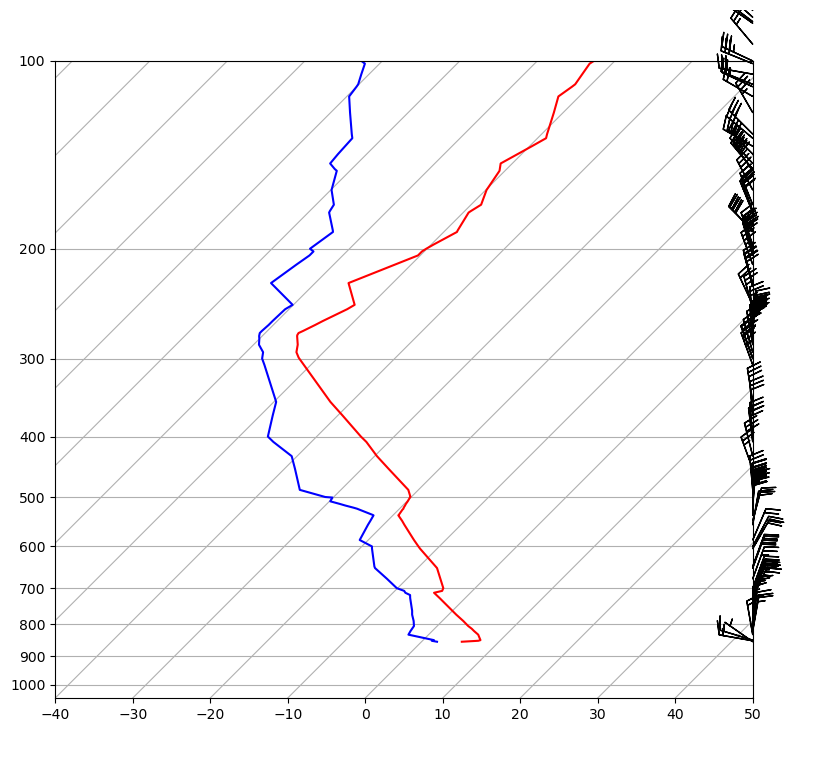

In [42]:
# make figure and `SkewT` object
fig = plt.figure(figsize=(9, 9))
skewt = SkewT(fig=fig, rotation=45)

# plot sounding data
skewt.plot(p, T, 'r') # air temperature
skewt.plot(p, Td, 'b') # dew point
skewt.plot_barbs(p, u, v) # wind barbs

Let's talk break that down a bit.
    
```python
# make figure and `SkewT` object
fig = plt.figure(figsize=(9, 9))
skewt = SkewT(fig=fig, rotation=45)
```
First, we made a new figure and used it to make a new skew-T plot. If you don't provide a figure to `SkewT`, one will be created for you, but it's useful to make the default figure size a bit larger for this tutorial.

Additionally, we've also set the `rotation` kwarg to be 45 degrees. This is the angle that the temperature lines will be drawn at. Metpy's default is 30 degrees, but we're going to use a more traditional 45 degrees for this tutorial.

```python

```python
# plot sounding data
skewt.plot(p, T, 'r') # air temperature
skewt.plot(p, Td, 'b') # dew point
```

For air temperature and dew point, we can use the standard `plot` method. The `SkewT` object provides a wrapper around matplotlib's `plot` method, and can be used in the same way. Note that even though pressure is on the y-axis, we still provide it as the first argument to `plot` because it is the independent variable. 

```python
skewt.plot_barbs(p, u, v) # wind barbs
```

Finally, we use `SkewT`'s [`plot_barbs`](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot_barbs) method to add the wind barbs to the right side of the plot. This is a wrapper around matplotlib's [`barbs`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barbs.html#matplotlib.pyplot.barbs) method that applies the appropriate transformation and positions the barbs as expected for a Skew-T plot.

In addition to the elements we have added specifically, you can see that the `SkewT` object also added some of the structural elements we discussed previously. By default, `SkewT` adds the horizontal pressure and skewed temperature lines. 

### Adding more structural elements
Next, let's add the rest of the structural elements to the plot.

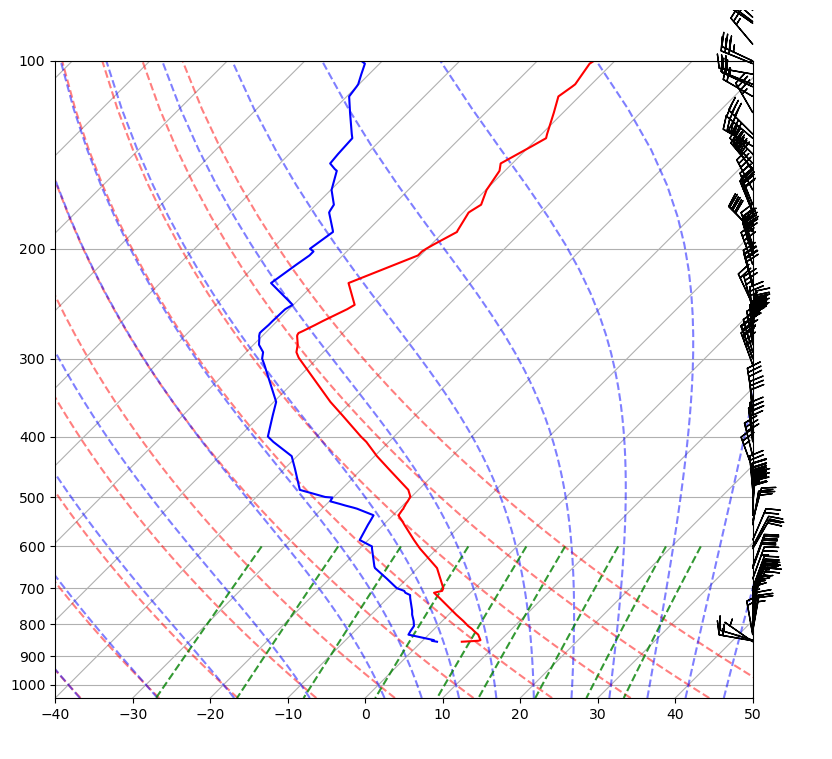

In [41]:
# make figure and `SkewT` object
fig = plt.figure(figsize=(9, 9))
skewt = SkewT(fig=fig, rotation=45)

# plot sounding data
skewt.plot(p, T, 'r') # air temperature
skewt.plot(p, Td, 'b') # dew point
skewt.plot_barbs(p, u, v) # wind barbs

# add dry adiabats, moist adiabats, and mixing ratio lines
skewt.plot_dry_adiabats()
skewt.plot_moist_adiabats()
skewt.plot_mixing_lines()


Similarly to the `plot_barbs` command, the `SkewT` object provides convenient methods for adding the remaining structural elements to the plot.

The default appearance of these elements is:
- **Dry Adiabats**: dashed red/pinkish lines with an alpha value of 0.5
- **Moist Adiabats**: dashed blue lines with an alpha value of 0.5
- **Mixing Ratio Lines**: dashed green lines with an alpha value of 0.8

These defaults can be overwritten by providing additional keyword arguments to the methods.

### Polishing the plot
Now that we have all the structural elements on the plot, let's make it look a little nicer. The previous plot has all the necessary information, but it's a little cluttered and hard to read.

Text(0, 0.5, 'pressure (hPa)')

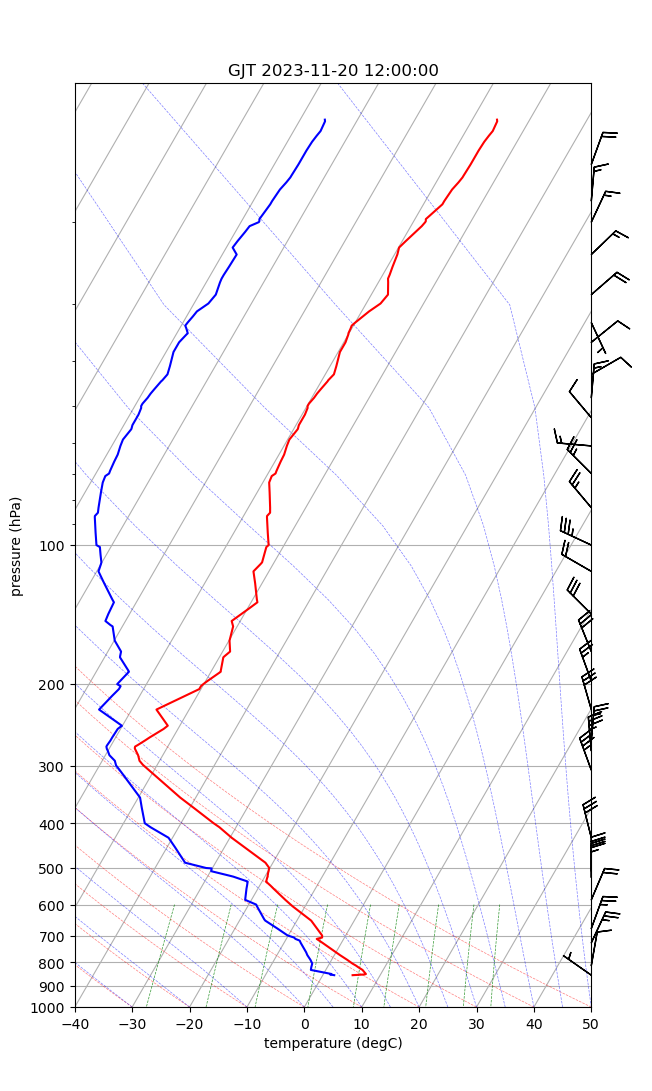

In [50]:
# make figure and `SkewT` object
fig = plt.figure(figsize=(8,12))
skewt = SkewT(fig=fig)
skewt.ax.set_ylim(1000, 10)

# plot sounding data
skewt.plot(p, T, 'r') # air temperature
skewt.plot(p, Td, 'b') # dew point
skewt.plot_barbs(p[::5], u[::5], v[::5]) # add a wind barb every fifth level

# add dry adiabats, moist adiabats, and mixing ratio lines
skewt.plot_dry_adiabats(linewidth=0.5)
skewt.plot_moist_adiabats(linewidth=0.5)
skewt.plot_mixing_lines(linewidth=0.5)

# add axis and figure titles
plt.title(df['station'][0] + ' ' + df['time'][0])
plt.xlabel('temperature (degC)')
plt.ylabel('pressure (hPa)')

Here, we've made the following changes:
- changed the figsize to `figsize=(8,12)`
- removed the `rotation` kwarg from the `SkewT` object to allow the upper air temp and dew point lines to be seen without being cut off or expanding the x-axis limits
- `skewt.ax.set_ylim(1000, 10)`: sets the y-axis limits to 1000 hPa at the bottom and 10 hPa at the top to include the entire sounding
- `skewt.plot_barbs(p[::5], u[::5], v[::5])`: plots every fifth wind barb to reduce clutter
- reduced the linewidth of the dry adiabats, moist adiabats, and mixing ratio lines to 0.5
- added axes labels
- added a title including the station name and date of the sounding pulled from the data

## Summary

### What's next?


## Resources and references

- [Wyoming Upper Air](https://weather.uwyo.edu/upperair/)
- [Siphon](https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html)
- [MetPy's SkewT documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html)
- [NOAA's JetStream](https://www.noaa.gov/jetstream) [Skew-T Plot](https://www.noaa.gov/jetstream/upperair/skew-t-plots) Section